In [81]:
# For data manipulation
import pandas as pd

# for scientific computation
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
from sklearn.metrics import r2_score

# for diagramming 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For serialization and deserialization of data from/to file
import pickle

In [3]:
# read the data
df = pd.read_csv("./data/house-data.csv", sep = ',')

In [4]:
df.shape

(21613, 21)

In [5]:
# see which are the attribute labels
list(df)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [6]:
# get idea of the look
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [7]:
# get idea of columns and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
# get idea of basic statistical parameters for each column
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [143]:
# if you want to change the format, for example to avoid scientific notation, e.g. e+04
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [144]:
df.sample()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
20127,2597490660,20140624T000000,639888.00,4,2.50,2050,2772,2.00,0,0,...,8,2050,0,2012,0,98029,47.54,-122.01,2050,2934


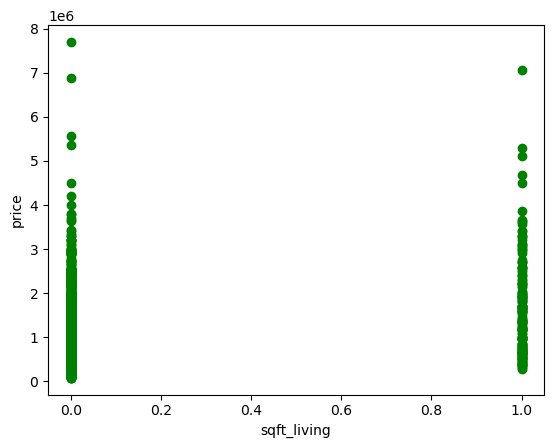

In [145]:
# plot all
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.scatter(df.waterfront, df.price, color='green')
plt.show()

C:\Users\Andre\AppData\Local\Temp\ipykernel_26756\2722519390.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'],  label='bedrooms', norm_hist=True)


<Axes: xlabel='price', ylabel='Density'>

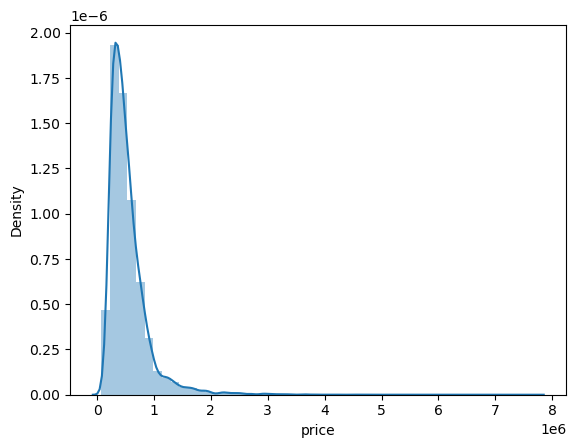

In [29]:
# sns.histplot(df['price'],  label='bedrooms')  
# sns.distplot(df['price'],  label='bedrooms', norm_hist=True)  
sns.distplot(df['price'],  label='bedrooms', norm_hist=True) 

<h3> Clean the Data </h3>

In [30]:
# to check null values in data
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<Axes: >

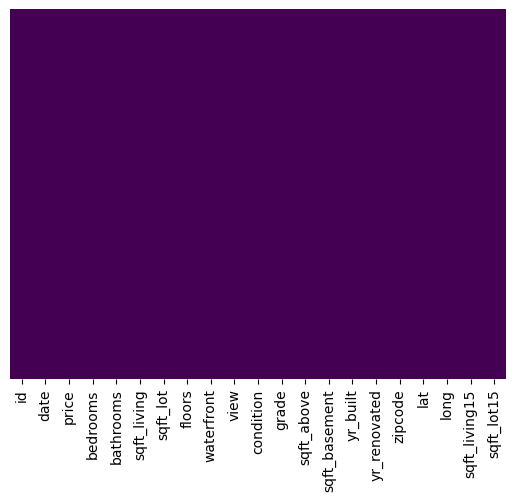

In [31]:
# same visualized
# makes sence if you have null values
sns.heatmap(df.isnull(), yticklabels= False, cbar=False, cmap= 'viridis')

In [32]:
corr_matrix = df.corr()
corr_matrix

C:\Users\Andre\AppData\Local\Temp\ipykernel_26756\2355143037.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00,-0.02,0.00,0.01,-0.01,-0.13,0.02,-0.00,0.01,-0.02,0.01,-0.01,-0.01,0.02,-0.02,-0.01,-0.00,0.02,-0.00,-0.14
price,-0.02,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,0.67,0.61,0.32,0.05,0.13,-0.05,0.31,0.02,0.59,0.08
bedrooms,0.00,0.31,1.00,0.52,0.58,0.03,0.18,-0.01,0.08,0.03,0.36,0.48,0.30,0.15,0.02,-0.15,-0.01,0.13,0.39,0.03
bathrooms,0.01,0.53,0.52,1.00,0.75,0.09,0.50,0.06,0.19,-0.12,0.66,0.69,0.28,0.51,0.05,-0.20,0.02,0.22,0.57,0.09
sqft_living,-0.01,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.44,0.32,0.06,-0.20,0.05,0.24,0.76,0.18
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,-0.01,0.11,0.18,0.02,0.05,0.01,-0.13,-0.09,0.23,0.14,0.72
floors,0.02,0.26,0.18,0.50,0.35,-0.01,1.00,0.02,0.03,-0.26,0.46,0.52,-0.25,0.49,0.01,-0.06,0.05,0.13,0.28,-0.01
waterfront,-0.00,0.27,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,0.07,0.08,-0.03,0.09,0.03,-0.01,-0.04,0.09,0.03
view,0.01,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,0.25,0.17,0.28,-0.05,0.10,0.08,0.01,-0.08,0.28,0.07
condition,-0.02,0.04,0.03,-0.12,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.14,-0.16,0.17,-0.36,-0.06,0.00,-0.01,-0.11,-0.09,-0.00


<Axes: >

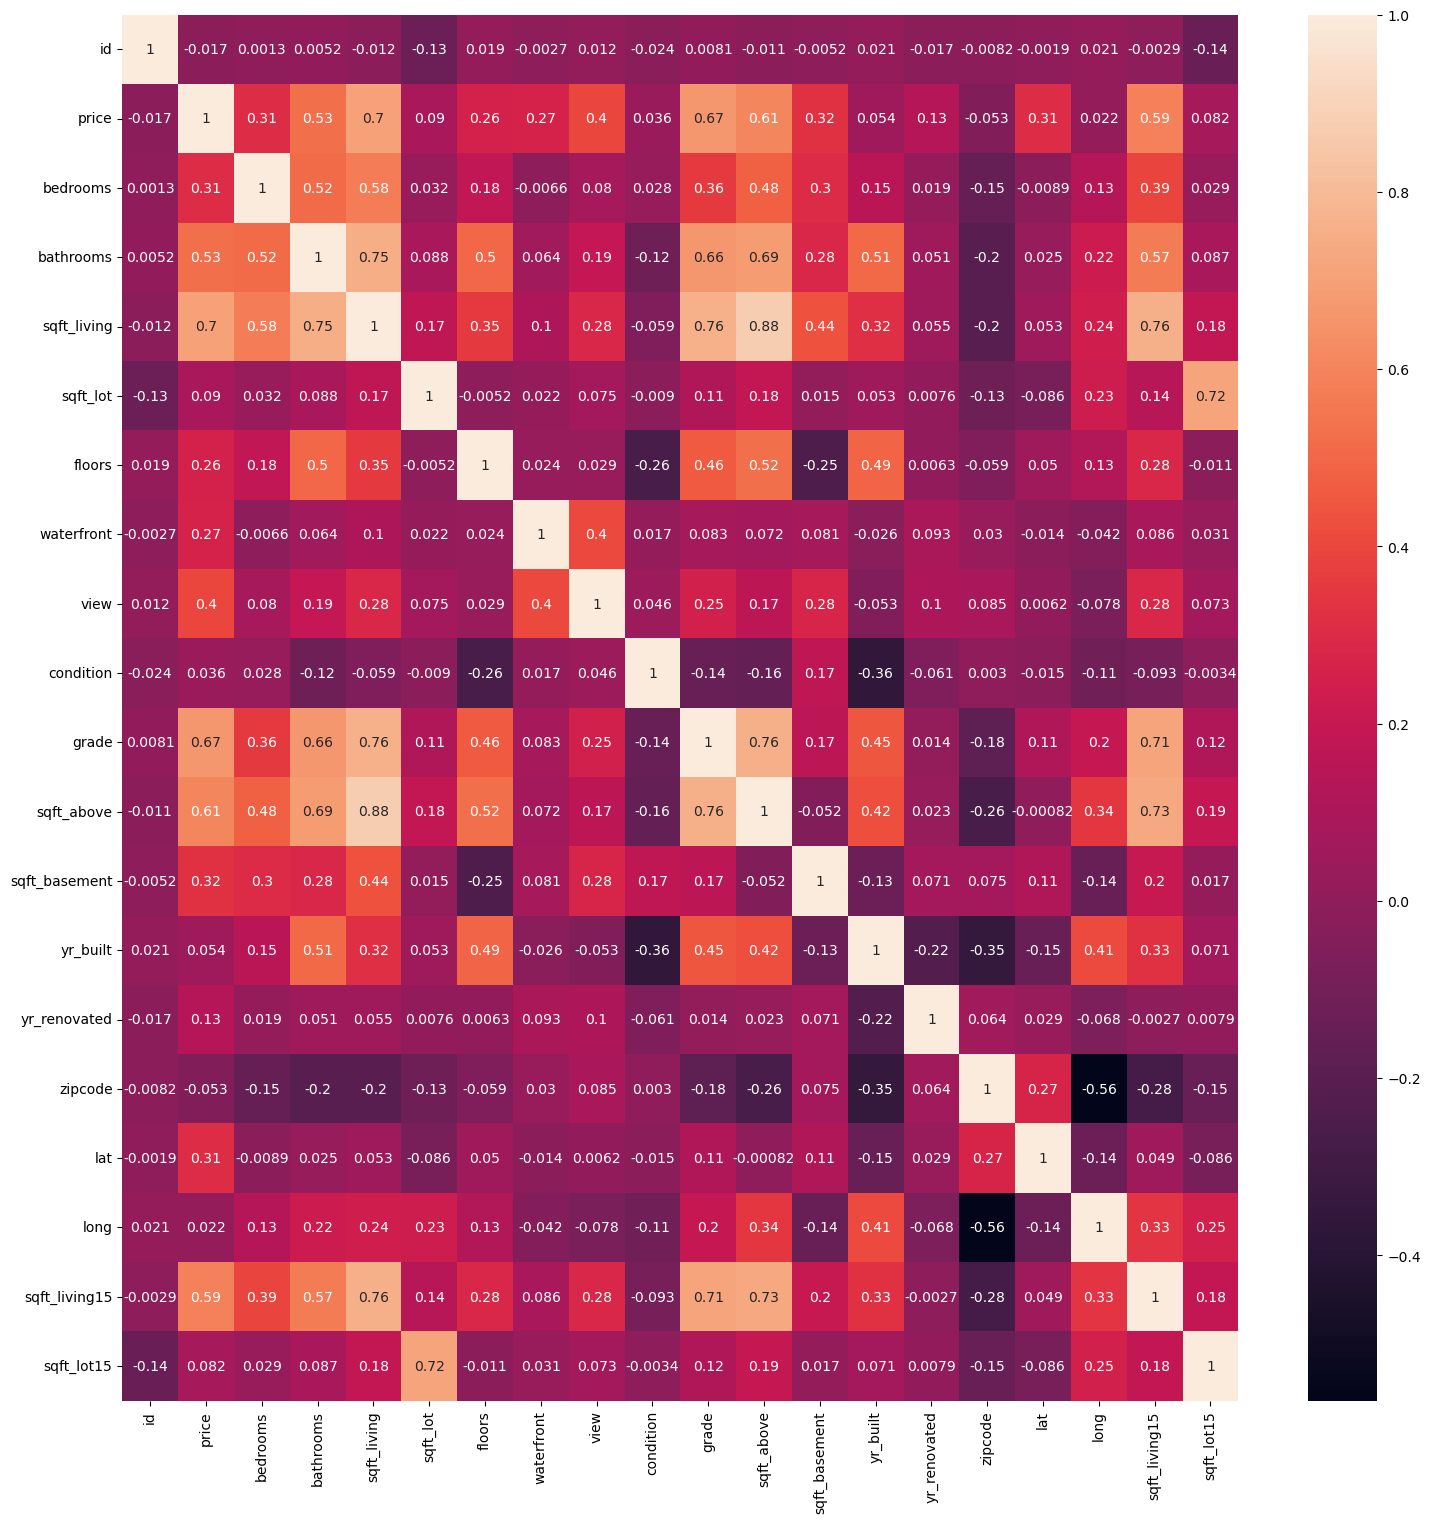

In [80]:
# plot the matrix as a heat map
plt.subplots(figsize = (18, 18))
sns.heatmap(corr_matrix, annot=True)

In [34]:
X = df['sqft_living'].values.reshape(-1, 1)
y = df['price'].values.reshape(-1, 1)

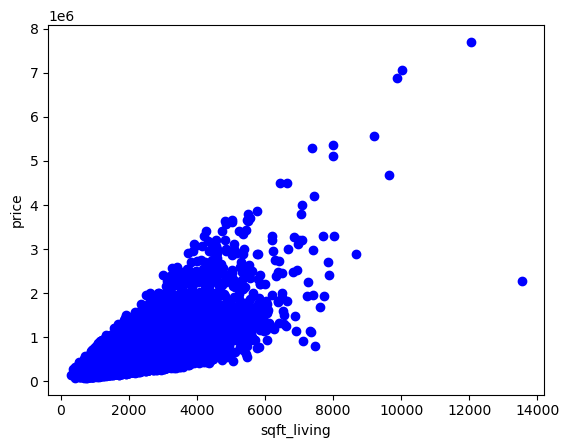

In [35]:
# plot all
plt.ylabel('price')
plt.xlabel('sqft_living')
plt.scatter(X, y, color='blue')
plt.show()

In [36]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.15) 

In [37]:
# the shape of the subsets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(18371, 1)
(18371, 1)
(3242, 1)
(3242, 1)


In [38]:
y_test

array([[532500.],
       [410000.],
       [782500.],
       ...,
       [442000.],
       [326500.],
       [255000.]])

In [39]:
# creating an instance of Linear Regression model
myreg = LinearRegression()

In [40]:
# fit it to our data
myreg.fit(X_train, y_train)
myreg

LinearRegression()

In [41]:
# get the calculated coefficients
a = myreg.coef_
b = myreg.intercept_

In [44]:
a

array([[277.88028773]])

In [45]:
b

array([-38891.11523714])

In [46]:
y_predicted = myreg.predict(X_test)
y_predicted

array([[ 653030.80122013],
       [ 372371.71060895],
       [1003159.96376476],
       ...,
       [ 339026.07608089],
       [ 464072.20556111],
       [ 486302.62857982]])

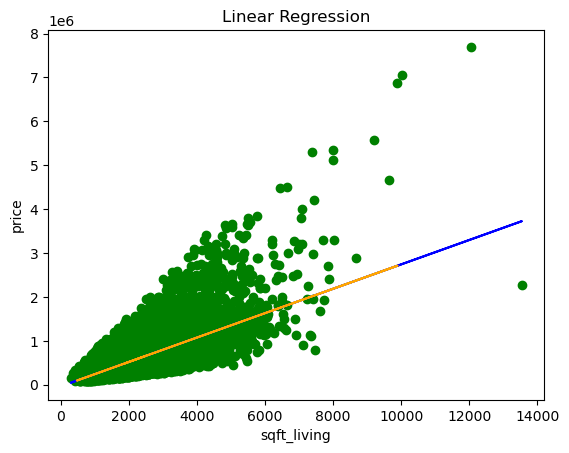

In [47]:
# Visualise the Linear Regression 
plt.title('Linear Regression')
plt.scatter(X, y, color='green')
plt.plot(X_train, a*X_train + b, color='blue')
plt.plot(X_test, y_predicted, color='orange')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

In [48]:
R2 = myreg.score(X, y)
R2

0.49279845827805924

In [50]:
# Split X and y
X, y = df.sqft_living, df.price

In [51]:
# split the set into subsets for training and testing
from sklearn.model_selection import train_test_split

# default proportion is 75:25
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15) 

In [52]:
# the shape of the subsets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(18371,)
(18371,)
(3242,)
(3242,)


In [53]:
# randomly selected
y_train

17801    427000.00
20764    380000.00
2285     225000.00
13350    681716.00
19376    440000.00
           ...    
10955    571000.00
17289   1350000.00
5192     650000.00
12172    437000.00
235     1025000.00
Name: price, Length: 18371, dtype: float64

In [54]:
# build a model from the train data with method 'polyfit'
model = np.polyfit(X_train, y_train, 1)

In [55]:
# get the result of fitting the regression line on the train data
model

array([   280.46173263, -43250.41440399])

In [56]:
a, b = model[0], model[1]

In [57]:
# build the model from the test data
test = np.polyfit(X_test, y_test, 1)
test

array([   281.46072803, -45304.95082875])

In [58]:
a1, b1 = test[0], test[1]

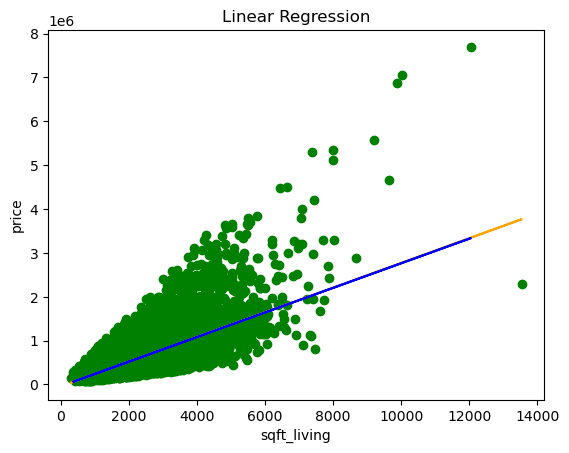

In [60]:
# Visualise the Linear Regression 
plt.title('Linear Regression')
plt.scatter(X, y, color='green')
plt.plot(X_test, a1*X_test + b1, color='orange')
plt.plot(X_train, a*X_train + b, color='blue')

plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

In [62]:
price_predicted = myreg.predict([[160]])
price_predicted

array([[5569.73080028]])

In [63]:
price_predict = a*160 + b
price_predict

1623.4628162270892

In [65]:
# assume a new fish 
squarefeet_living = 20000
price_predicted = myreg.predict([[squarefeet_living]])
price_predicted

array([[5518714.63943967]])

In [66]:
# MAE
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_predicted)
print(mae)

307200.5229482354


In [67]:
# MSE
mse = metrics.mean_squared_error(y_test, y_predicted)
print(mse)

217434347218.221


In [68]:
# RMSE
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predicted))
print(rmse)

466298.56017172197


In [69]:
# RMSE
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predicted))
print(rmse)

466298.56017172197


In [70]:
# R-squared
from sklearn.metrics import r2_score
#r2_score(y, predict(X))
r2_score(y_test, y_predicted)

-0.48067986653609873

<h1> Store the Model </h1>

In [71]:
# Store the model in a file
model_file = './deploy/mypolifit.pkl'

In [72]:
# Save now
with open(model_file, 'wb') as f:
    pickle.dump(model, f)

In [73]:
# To load it later for reuse
with open(model_file, 'rb') as f:
    mymodel = pickle.load(f)

In [131]:
# Test reading from the file
predict = np.poly1d(mymodel)
my_sqft_living_prediction = predict(15000)
print(my_sqft_living_prediction)

4163675.574991622


<h1> E4-2 Multiple Linear Regression </h1>

In [85]:
# check the shape of the DataFrame (rows, columns)
df.shape

(21613, 21)

In [86]:
# display the first 5 rows
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [87]:
# display the last 5 rows
df.tail(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21593,8672200110,20150317T000000,1088000.00,5,3.75,4170,8142,2.00,0,2,...,10,4170,0,2006,0,98056,47.54,-122.18,3030,7980
21594,5087900040,20141017T000000,350000.00,4,2.75,2500,5995,2.00,0,0,...,8,2500,0,2008,0,98042,47.37,-122.11,2530,5988
21595,1972201967,20141031T000000,520000.00,2,2.25,1530,981,3.00,0,0,...,8,1480,50,2006,0,98103,47.65,-122.35,1530,1282
21596,7502800100,20140813T000000,679950.00,5,2.75,3600,9437,2.00,0,0,...,9,3600,0,2014,0,98059,47.48,-122.13,3550,9421
21597,191100405,20150421T000000,1575000.00,4,3.25,3410,10125,2.00,0,0,...,10,3410,0,2007,0,98040,47.57,-122.22,2290,10125
21598,8956200760,20141013T000000,541800.00,4,2.50,3118,7866,2.00,0,2,...,9,3118,0,2014,0,98001,47.29,-122.26,2673,6500
21599,7202300110,20140915T000000,810000.00,4,3.00,3990,7838,2.00,0,0,...,9,3990,0,2003,0,98053,47.69,-122.05,3370,6814
21600,249000205,20141015T000000,1537000.00,5,3.75,4470,8088,2.00,0,0,...,11,4470,0,2008,0,98004,47.63,-122.20,2780,8964
21601,5100403806,20150407T000000,467000.00,3,2.50,1425,1179,3.00,0,0,...,8,1425,0,2008,0,98125,47.70,-122.32,1285,1253
21602,844000965,20140626T000000,224000.00,3,1.75,1500,11968,1.00,0,0,...,6,1500,0,2014,0,98010,47.31,-122.00,1320,11303


In [88]:
df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
20309,7768800280,20140722T000000,870515.00,4,3.50,3600,5697,2.00,0,0,...,9,2940,660,2014,0,98075,47.58,-122.07,3490,5911
2496,1000102,20140916T000000,280000.00,6,3.00,2400,9373,2.00,0,0,...,7,2400,0,1991,0,98002,47.33,-122.21,2060,7316
19436,3179102305,20140717T000000,580000.00,3,1.75,2100,6874,1.00,0,0,...,7,1300,800,1943,0,98115,47.67,-122.28,2220,5912
17448,7806210250,20150406T000000,235000.00,4,1.75,1920,9350,1.00,0,0,...,7,1000,920,1977,0,98002,47.29,-122.19,1910,8400
16258,1652500010,20150326T000000,2328000.00,4,3.50,4420,20759,2.00,0,0,...,11,4420,0,2003,0,98004,47.64,-122.22,3020,20666


In [91]:
df[59, :]

InvalidIndexError: (59, slice(None, None, None))

In [92]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2876565571.31,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


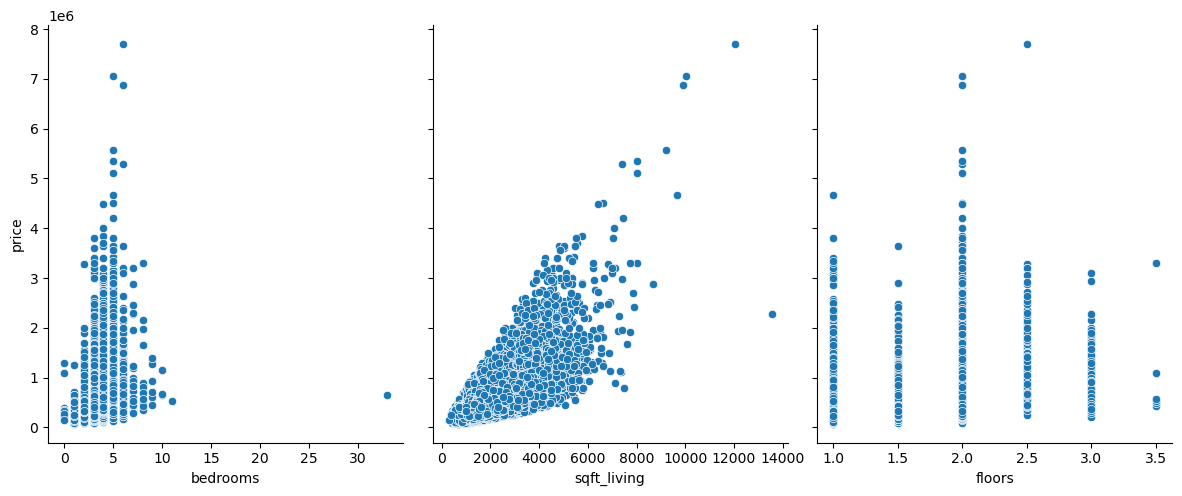

In [93]:
# visualise the features and the response using scatterplots
sns.pairplot(df, x_vars=['bedrooms', 'sqft_living','floors'], y_vars='price', height=5, aspect=0.8)

<h3> Train a model </h3>
<h4> Multiple Linear Regression </h4>

In [94]:
# create a Python list of feature names
feature_cols = ['bedrooms', 'sqft_living']

# use the list to select a subset of the original DataFrame
X = df[feature_cols]

# print the first 5 rows
X.head()

,bedrooms,sqft_living
0,3,1180
1,3,2570
2,2,770
3,4,1960
4,3,1680


In [95]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(21613, 2)


In [98]:
# select a Series from the DataFrame for y
y = df['price']

# equivalent command that works if there are no spaces in the column name
y = df.price

# print the first 5 values
y.head()

0   221900.00
1   538000.00
2   180000.00
3   604000.00
4   510000.00
Name: price, dtype: float64

In [99]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(21613,)


In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [101]:
# default split 75:25
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16209, 2)
(16209,)
(5404, 2)
(5404,)


<h4> Linear Regression by scikit-learn </h4> 

In [102]:
# create a model
linreg = LinearRegression()

# fit the model to our training data
linreg.fit(X_train, y_train)

LinearRegression()

### Interpret Model Coefficients

In [104]:
# the intercept and coefficients are stored in system variables
print('b0 =', linreg.intercept_)
print('bi =', linreg.coef_)

b0 = 83097.36413515953
bi = [-54291.56348886    306.89571457]


In [105]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('bedrooms', -54291.56348885819), ('sqft_living', 306.8957145690373)]

In [106]:
yz=pd.DataFrame(y_test)
yz

,price
15544,459000.00
17454,445000.00
21548,1057000.00
3427,732350.00
8809,235000.00
...,...
12416,680000.00
8253,267500.00
4251,725000.00
11404,253500.00


In [107]:
X_test

,bedrooms,sqft_living
15544,4,2790
17454,3,1630
21548,2,2370
3427,4,2270
8809,3,1430
...,...,...
12416,3,2300
8253,2,960
4251,3,2610
11404,3,1220


In [109]:
k = [[200, 100]]

In [110]:
y = linreg.predict(k)
y

C:\Users\Andre\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-10744525.76217958])

In [111]:
# make predictions on the testing set
y_predicted = linreg.predict(X_test)

In [112]:
y_predicted.reshape(-1 ,1)

array([[722170.15382734],
       [420462.68841612],
       [701857.08068606],
       ...,
       [721220.48869377],
       [294635.44544281],
       [351995.96607736]])

In [113]:
z=pd.DataFrame(y_predicted)
z

,0
0,722170.15
1,420462.69
2,701857.08
3,562584.38
4,359083.55
...,...
5399,626082.82
5400,269134.12
5401,721220.49
5402,294635.45


## Model evalutation

In [114]:
# calculate MAE using scikit-learn
from sklearn import metrics

In [115]:
print(metrics.mean_absolute_error(y_test, y_predicted))

172066.1397925087


In [116]:
# calculate MSE using scikit-learn
print(metrics.mean_squared_error(y_test, y_predicted))

77371334382.22809


In [117]:
# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

278157.0318762912


In [118]:
# Explained variance (1 would be the best prediction)
eV = round(sm.explained_variance_score(y_test, y_predicted), 2)
print('Explained variance score ',eV )

Explained variance score  0.52


In [119]:
# R-squared
r2_score(y_test, y_predicted)

0.5167957732444808

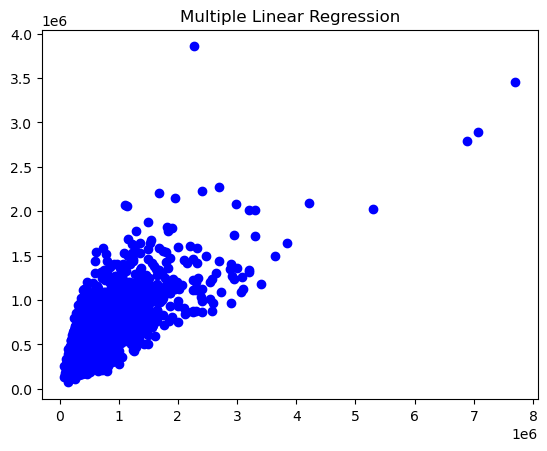

In [120]:
# Visualise the regression results
plt.title('Multiple Linear Regression')
plt.scatter(y_test, y_predicted, color='blue')
plt.show()

# Store the Model

In [121]:
# Store the model in a file
model_file = './deploy/mypolifit_miniproject3.pkl'

In [137]:
# Save now
with open(model_file, 'wb') as f:
    pickle.dump(model, f)

In [138]:
# To load it later for reuse
with open(model_file, 'rb') as f:
    mymodel = pickle.load(f)

In [139]:
# Test reading from the file
predict = np.poly1d(mymodel)
my_sqft_living_prediction = predict(15000)
print(my_sqft_living_prediction)

4163675.574991622
